In [1]:
%matplotlib inline

In [2]:
#from waterfallcharts import quick_charts as qc
from matplotlib.ticker import FuncFormatter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
def waterfall(index, data, Title = "Example Chart", x_lab = "Example Increments", DPI=200,
              formatting = "{:,.0f}", sorted_value = False, threshold=None):
    
    #convert data and index to np.array
    index=np.array(index)
    data=np.array(data)
    
    #sorted by absolute value 
    if sorted_value: 
        abs_data = abs(data)
        data_order = np.argsort(abs_data)[::-1]
        data = data[data_order]
        index = index[data_order]
    
    #group contributors less than the threshold into 'other' 
    if threshold:
        
        abs_data = abs(data)
        threshold_v = abs_data.max()*threshold
        
        if threshold_v > abs_data.min():
            index = np.append(index[abs_data>=threshold_v],'other')
            data = np.append(data[abs_data>=threshold_v],sum(data[abs_data<threshold_v]))
            
    changes = {'amount' : data}
    
    def money(x, pos):
        'The two args are the value and tick position'
        return formatting.format(x)
    formatter = FuncFormatter(money)

    #Store data and create a blank series to use for the waterfall
    trans = pd.DataFrame(data=changes,index=index)
    blank = trans.amount.cumsum().shift(1).fillna(0)

    #Get the net total number for the final element in the waterfall
    total = trans.sum().amount
    trans.loc["net"]= total
    blank.loc["net"] = total

    #The steps graphically show the levels as well as used for label placement
    step = blank.reset_index(drop=True).repeat(3).shift(-1)
    step[1::3] = np.nan

    #When plotting the last element, we want to show the full bar,
    #Set the blank to 0
    blank.loc["net"] = 0

    #Plot and label
    my_plot = trans.plot(kind='bar', stacked=True, bottom=blank,legend=None, figsize=(10, 5), title=Title)
    #my_plot.plot(step.index, step.values,'k') #this makes the blank lines
    my_plot.set_xlabel(x_lab)
    
    #Format the axis for dollars
    my_plot.yaxis.set_major_formatter(formatter)

    #Get the y-axis position for the labels
    y_height = trans.amount.cumsum().shift(1).fillna(0)

    #Get an offset so labels don't sit right on top of the bar
    max = trans.max()
    neg_offset = max / 25
    pos_offset = max / 50
    plot_offset = int(max / 15)

    #Start label loop
    loop = 0
    for index, row in trans.iterrows():
        # For the last item in the list, we don't want to double count
        if row['amount'] == total:
            y = y_height[loop]
        else:
            y = y_height[loop] + row['amount']
        # Determine if we want a neg or pos offset
        if row['amount'] > 0:
            y += pos_offset
        else:
            y -= neg_offset
        my_plot.annotate(formatting.format(row['amount']),(loop,y),ha="center")
        loop+=1

    #Scale up the y axis so there is room for the labels
    my_plot.set_ylim(0,blank.max()+int(plot_offset))
    #Rotate the labels
    my_plot.set_xticklabels(trans.index,rotation=0)
    my_plot.get_figure().savefig("waterfall_%s.png" % Title.replace(" ", "-"),dpi=DPI,bbox_inches='tight')

    return my_plot

In [5]:
plot = waterfall()

TypeError: waterfall() missing 2 required positional arguments: 'index' and 'data'

In [7]:
a = ['sales','returns','credit fees','rebates','late charges','shipping']
b = [350000,-30000,-7500,-25000,95000,-7000]

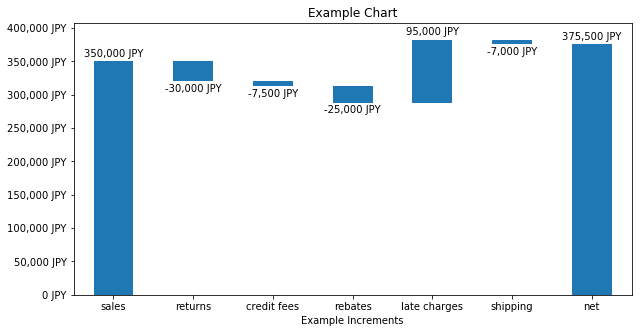

In [8]:
plot = waterfall(a, b, formatting= "{:,.0f} JPY", DPI=600)

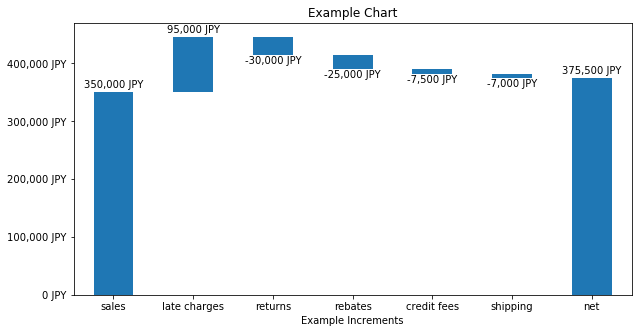

In [9]:
plot = waterfall(a, b, formatting= "{:,.0f} JPY", DPI=600, sorted_value=True)

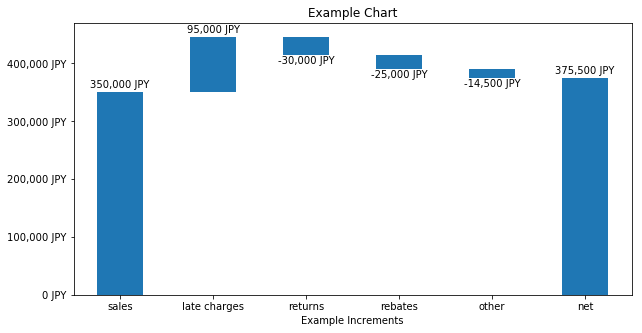

In [10]:
plot = waterfall(a, b, formatting= "{:,.0f} JPY", DPI=600, sorted_value=True, threshold=0.05)

In [61]:
import matplotlib.patches as patches

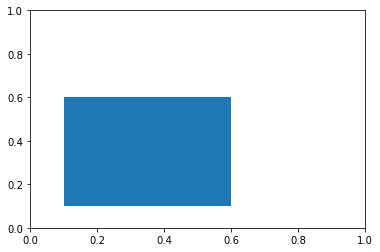

In [81]:
fig1 = plt.figure()
#ax1 = fig1.add_subplot(111, aspect='equal')
ax1 = fig1.add_subplot(1,1,1)
ax1.add_patch(
    patches.Rectangle(
        (0.1, 0.1),   # (x,y)
        0.5,          # width
        0.5,          # height
    )
)

<Container object of 7 artists>

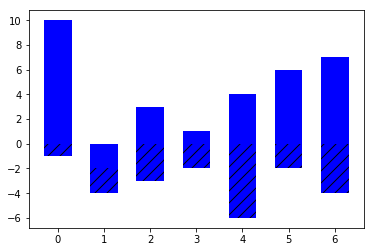

In [94]:
x = range(7)
negative_data = [-1,-4,-3,-2,-6,-2,-4]
positive_data = [10,-2,3,1,4,6,7,]

fig = plt.figure()
ax = plt.subplot(111)
ax.bar(x, negative_data, width=0.6, color='b', hatch="//")
ax.bar(x, positive_data, width=0.6, color='b')

<Container object of 4 artists>

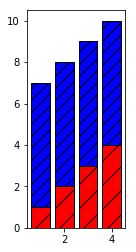

In [88]:
fig = plt.figure()
ax1 = fig.add_subplot(131)
ax1.bar(range(1, 5), range(1, 5), color='red', edgecolor='black', hatch="/")
ax1.bar(range(1, 5), [6] * 4, bottom=range(1, 5), color='blue', edgecolor='black', hatch='//')
#ax1.set_xticks([1.5, 2.5, 3.5, 4.5])

<Container object of 7 artists>

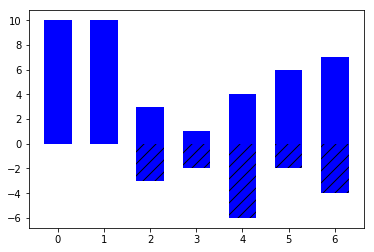

In [96]:
x = range(7)
negative_data = [0,5,-3,-2,-6,-2,-4]
positive_data = [10,10,3,1,4,6,7,]

fig = plt.figure()
ax = plt.subplot(111)
ax.bar(x, negative_data, width=0.6, color='b', hatch="//")
ax.bar(x, positive_data, width=0.6, color='b')